In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Import data
data = pd.read_csv("../glass.csv")

In [3]:
print (data.shape)
data.head()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print (data.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


Fortunately all data is numeric

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Look for missing values
print (data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


there's no any missing value

In [7]:
corr_type = data.corr()["Type"]
print (corr_type)

RI     -0.164237
Na      0.502898
Mg     -0.744993
Al      0.598829
Si      0.151565
K      -0.010054
Ca      0.000952
Ba      0.575161
Fe     -0.188278
Type    1.000000
Name: Type, dtype: float64


In [8]:
# Delete unneseccary columns
cols = []
for col in data.columns:
    if abs(corr_type[col]) > 0.2:
        cols.append(col)

print (cols)

['Na', 'Mg', 'Al', 'Ba', 'Type']


In [9]:
final_d = data[cols]

In [10]:
print (final_d.shape)
final_d.head()

(214, 5)


,Na,Mg,Al,Ba,Type
0,13.64,4.49,1.10,0.0,1
1,13.89,3.60,1.36,0.0,1
2,13.53,3.55,1.54,0.0,1
3,13.21,3.69,1.29,0.0,1
4,13.27,3.62,1.24,0.0,1


In [11]:
final_d.describe()

,Na,Mg,Al,Ba,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,13.407850,2.684533,1.444907,0.175047,2.780374
std,0.816604,1.442408,0.499270,0.497219,2.103739
min,10.730000,0.000000,0.290000,0.000000,1.000000
25%,12.907500,2.115000,1.190000,0.000000,1.000000
50%,13.300000,3.480000,1.360000,0.000000,2.000000
75%,13.825000,3.600000,1.630000,0.000000,3.000000
max,17.380000,4.490000,3.500000,3.150000,7.000000


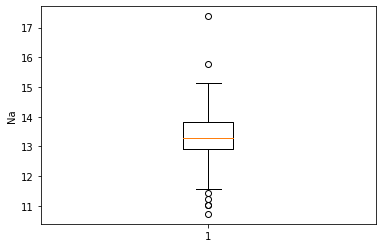

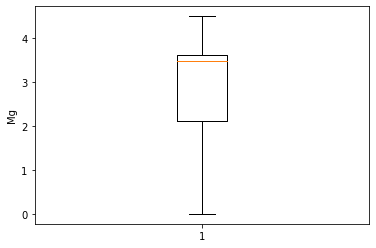

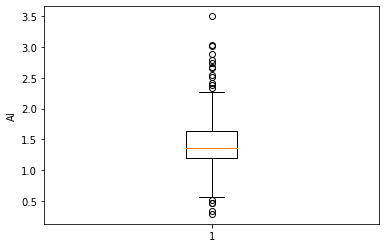

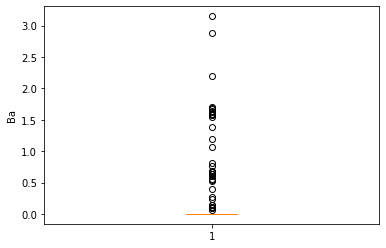

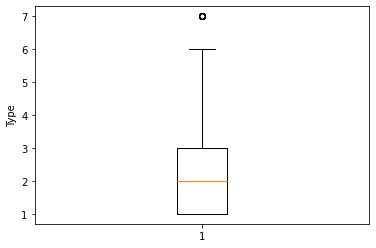

In [12]:
# Outliers
for col in final_d.columns:
    plt.boxplot(data[col])
    plt.ylabel(col)
    plt.show()

The data has a little rows and We should keep them and due to data we have to keep outliers

In [13]:
# Save data
final_d.to_csv("data.csv", index = False)